# Notebook 1: Data Acquisition and Exploratory Data Analysis

**Objective:** To connect to the WRDS and FRED databases, download all necessary raw time series data, perform initial validation and sanity checks, and save the raw data to the `/data/raw/` directory for future use.

In [72]:
%reload_ext autoreload
%autoreload 2
#Tells the kernel to automatically check for changes in imported files

In [73]:
import os
import sys
from pathlib import Path
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wrds

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

from src import data_loader

print("Connecting to WRDS...")
# Create the connection object here
db = wrds.Connection() 
print("Connection Successful")


sns.set_style('whitegrid')

Connecting to WRDS...
Loading library list...
Done
Connection Successful


## WRDS Data: VIX and SPX Indices

Our first step is to acquire the daily price data for the VIX and SPX indices from the WRDS OptionMetrics database using our `give_raw_data` function in data_loader.py

In [74]:
#get data
vix_daily_raw_data = data_loader.give_raw_data(db_connection = db, ticker = 'VIX')
spx_daily_raw_data = data_loader.give_raw_data(db_connection=db, ticker = 'SPX')
vvix_daily_raw_data = data_loader.vvix_daily_raw_data


#store data
data_loader.store_raw_data(vix_daily_raw_data, 'vix_daily_raw.csv')
data_loader.store_raw_data(spx_daily_raw_data, 'spx_daily_raw.csv')
data_loader.store_raw_data(vvix_daily_raw_data, 'vvix_daily_raw.csv')
print("Data fetching and storing Completed.")
db.close()
print("WRDS connection is now closed.")

Data fetching and storing Completed.
WRDS connection is now closed.


## Validation and EDA

Now that the data is properly stored, we will load it back to do some validation checks. After storing the data, we want to see how it gets displayed when you retrieve it. For loading raw data, we can directly use the `load_raw_data` function from `data_loader.py` module.



In [75]:
#validation check for vix_data
vix_daily_raw = data_loader.load_raw_data('vix_daily_raw.csv')
vix_daily_raw

,date,close,open,high,low
0,1996-01-02,12.19,0.00,12.19,12.19
1,1996-01-03,12.10,0.00,12.10,12.10
2,1996-01-04,13.78,0.00,13.78,13.78
3,1996-01-05,13.58,0.00,13.58,13.58
4,1996-01-08,13.11,0.00,13.11,13.11
...,...,...,...,...,...
6958,2023-08-25,15.68,17.21,17.36,15.45
6959,2023-08-28,15.08,16.24,16.28,15.00
6960,2023-08-29,14.45,15.08,15.30,14.34
6961,2023-08-30,13.88,14.53,14.70,13.83


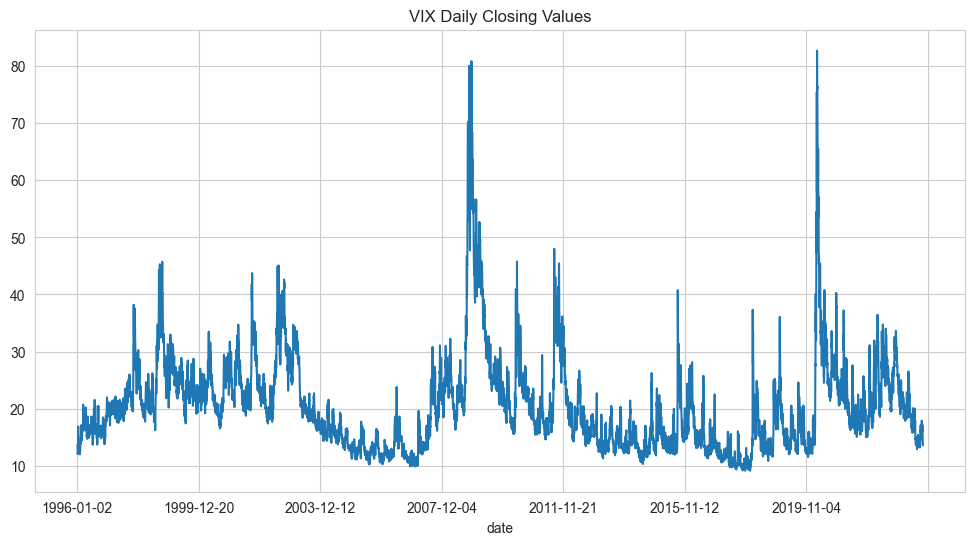

In [76]:
#Basic Visualization
vix_daily_raw.plot(x = 'date', y = 'close',title='VIX Daily Closing Values', figsize=(12,6), legend = False)
plt.show()

In [77]:
#validation check for spx_data
spx_daily_raw = data_loader.load_raw_data('spx_daily_raw.csv')
spx_daily_raw

,date,close,open,high,low
0,1996-01-02,620.73,615.93,620.74,613.17
1,1996-01-03,621.32,620.73,623.25,619.56
2,1996-01-04,617.70,621.32,624.49,613.96
3,1996-01-05,616.71,617.70,617.70,612.02
4,1996-01-08,618.46,616.71,618.46,616.49
...,...,...,...,...,...
6960,2023-08-25,4405.71,4389.38,4418.46,4356.29
6961,2023-08-28,4433.31,4426.03,4439.56,4414.98
6962,2023-08-29,4497.63,4432.75,4500.14,4431.68
6963,2023-08-30,4514.87,4500.34,4521.65,4493.59


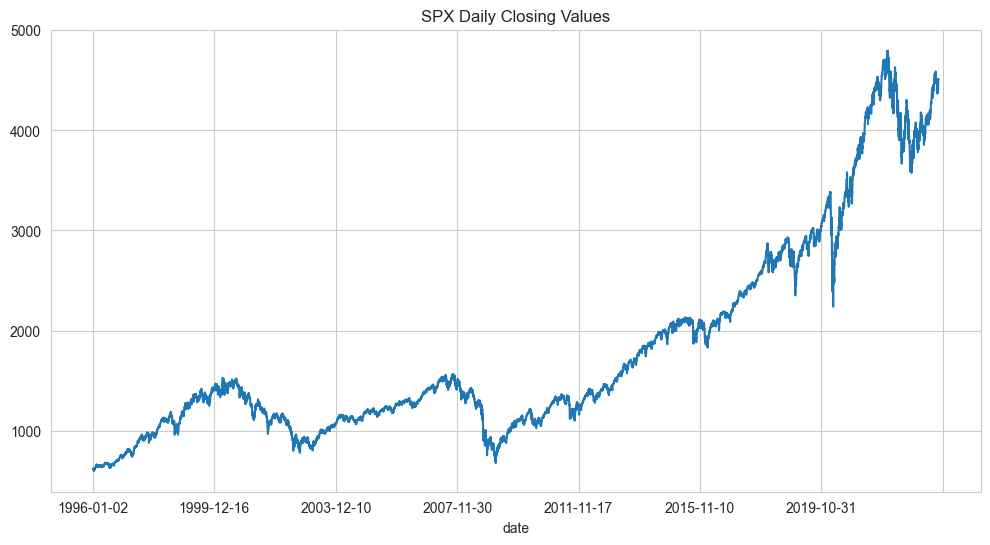

In [78]:
#Basic Visualization
spx_daily_raw.plot(x = 'date', y = 'close',title='SPX Daily Closing Values', figsize=(12,6), legend = False)
plt.show()

In [79]:
#validation check for vvix_data
vvix_daily_raw = data_loader.load_raw_data('vvix_daily_raw.csv')
vvix_daily_raw

,DATE,VVIX
0,03/06/2006,71.73
1,03/15/2006,15.71
2,03/16/2006,27.94
3,03/17/2006,28.60
4,03/20/2006,37.93
...,...,...
4857,09/22/2025,99.75
4858,09/23/2025,101.23
4859,09/24/2025,99.99
4860,09/25/2025,100.34


In [ ]:
#Basic Visualization
vvix_daily_raw_data.plot(x = 'DATE', y= 'VVIX',title='VVIX Daily Closing Values', figsize=(12,6), legend=False)
plt.show()